## 1. gif 파일 불러오기

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

In [6]:
# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture("./fire_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 14
frame 크기 : (282, 300, 3)


## 2. 프레임별 Super Resolution 진행하기

In [7]:
import tensorflow as tf
import os

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [8]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [9]:
# SRGAN 작업
frames_sr = []
for i in range(len(frames)):
    frames_sr.append(apply_srgan(frames[i]))  

In [11]:
# bicubic 작업
frames_bi = []
for i in range(len(frames)):
    bicubic_hr = cv2.resize(
        frames[0], 
        dsize=(frames[0].shape[1], frames[0].shape[0]), # 고해상도 이미지 크기로 설정
        interpolation=cv2.INTER_CUBIC # bicubic 설정
    )
    frames_bi.append(bicubic_hr)
    
len(frames_bi)

14

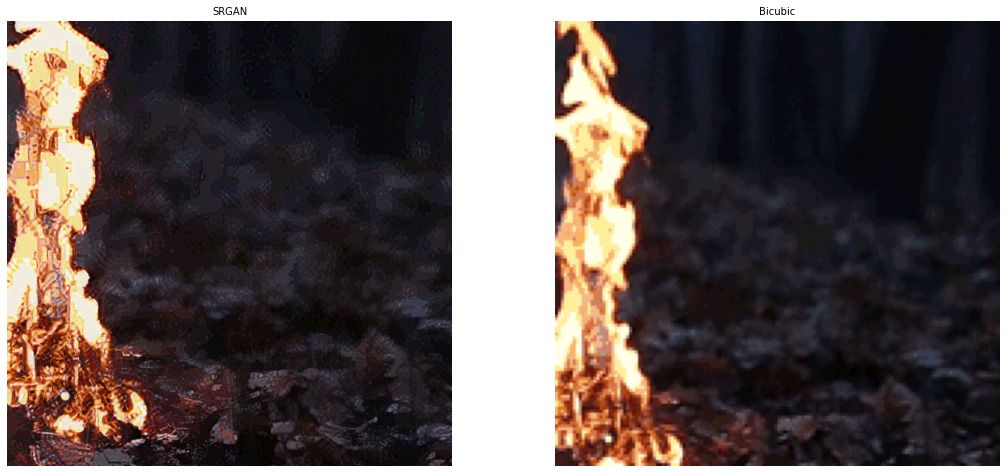

In [12]:
# bicubic과 SRGAN 시각화
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


images = []
for i in range(len(frames_sr)):
    img1 = crop(frames_sr[i] , (500,600), 550, 550)
    img2 = crop(frames_bi[i], (100,150), 150, 150)

    images.extend([img1, img2])


labels = ["SRGAN", "Bicubic" ]

plt.figure(figsize=(18,18))
for i in range(2):
    plt.subplot(2,2,i+1) 
    plt.imshow(images[i])
    plt.title(labels[i], fontsize=10)
    plt.axis("off")

## 3. 프레임을 합쳐 gif 만들기

위에서 frame_sr을 만들었다면 아래 코드와 같이 gif 파일을 생성할 수 있습니다.  
Bicubic 및 SRGAN의 결과를 각각 저장하여 2개 파일을 만들어 주세요.

In [13]:
import imageio

imageio.mimsave("bicubic_frames.gif", frames_bi)
imageio.mimsave("srgan_frames.gif", frames_sr)

## 4. Jupyter notebook에 gif 표시하기

아래와 같이 다운받은 저해상도 gif 파일과 고해상도 gif 파일을 각각 jupyter 내에 출력하여 최종 제출해 주시면 됩니다.  
jupyter 내에 출력이 어려운 경우, GitHub에 저해상도, 고해상도 gif파일을 업로드 후 링크를 첨부해주시기 바랍니다.  
Super Resolution이 잘 적용되었는지 시각적으로 확인하기 위해 아래의 width 옵션을 적당히 크게 해주세요.  
저해상도 및 고해상도 시각화의 width 값은 같도록 설정해주세요.  

In [14]:
from IPython.display import Image as show_gif

### bicubic

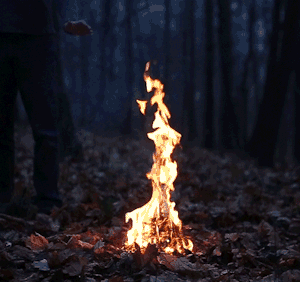

In [15]:
show_gif("bicubic_frames.gif", width=300)

### SRGAN

In [ ]:
show_gif("srgan_frames.gif", width=200)